# Coding the Perceptron Algorithm

Time to code! In this quiz, you'll have the chance to implement the perceptron algorithm to separate the following data (given in the file data.csv).

<br><img src='data.png' alt='Data' style='width: 480px'><br>

Recall that the perceptron step works as follows. For a point with coordinates $(p,q)$, label $y$, and prediction given by the equation $\hat{y} = step(w_1x_1 + w_2x_2 + b)$

* If the point is correctly classified, do nothing.
* If the point is classified positive, but it has a negative label, subtract $\alpha p$, $\alpha q$, and $\alpha$ from $w_1$, $w_2$, and $b$ respectively.
* If the point is classified negative, but it has a positive label, add $\alpha p$, $\alpha q$, and $\alpha$ to $w_1$, $w_2$, and $b$ respectively.

Then click on `test run` to graph the solution that the perceptron algorithm gives you. It'll actually draw a set of dotted lines, that show how the algorithm approaches to the best solution, given by the black solid line.

Feel free to play with the parameters of the algorithm (number of epochs, learning rate, and even the randomizing of the initial parameters) to see how your initial conditions can affect the solution!

In [1]:
import numpy as np

# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)

        if y_hat > y[i]:
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            b -= learn_rate
        elif y_hat < y[i]:
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
            b += learn_rate

    # Fill in code
    return W, b

# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])

    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max

    # These are the solution lines that get plotted below.
    boundary_lines = []

    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0] / W[1], -b / W[1]))

    return boundary_lines

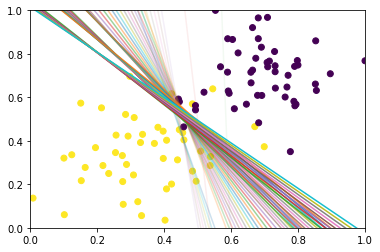

In [2]:
# This cell was added for visualization

import pandas as pd
import matplotlib.pyplot as plt

# This function plot lines for each of the steps.
def plot_line(slope, intercept, alpha):
    axes = plt.gca()
    x = np.array(axes.get_xlim())
    y = intercept + slope * x
    plt.plot(x, y, alpha = alpha)

# Testing...
df = pd.read_csv('data.csv', header = None)

plt.scatter(df[0], df[1], c = df[2])
X = df[[0, 1]].to_numpy()
y = df[2].to_numpy()

lines = trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 50)

alpha = 0
increment = 1 / len(lines)

for line in lines:
    alpha = alpha + increment
    plot_line(line[0], line[1], alpha)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()